In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [3]:
print(f"X_train.shape: {X_train.shape}")

X_train.shape: (60000, 28, 28)


In [4]:
X_train, X_test = X_train/255.0, X_test/255.0

In [5]:
X_train[0].shape

(28, 28)

In [6]:
# build a model
i = Input(shape=X_train[0].shape) # T x D
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-03-18 09:16:40.639137: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
r = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3268 - accuracy: 0.8955 - val_loss: 0.1161 - val_accuracy: 0.9655
Epoch 2/20
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1008 - accuracy: 0.9694 - val_loss: 0.1034 - val_accuracy: 0.9678
Epoch 3/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.0600 - val_accuracy: 0.9817
Epoch 4/20
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.0552 - val_accuracy: 0.9834
Epoch 5/20
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0519 - val_accuracy: 0.9843
Epoch 6/20
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0483 - val_accuracy: 0.9849
Epoch 7/20
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.

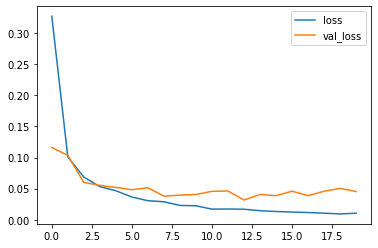

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

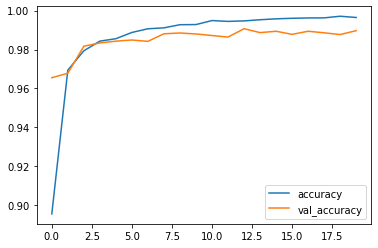

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion matrix, without normalization
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    1    1    0    0    0    0    1    0]
 [   2    0 1023    1    0    0    0    6    0    0]
 [   0    0    3 1002    0    2    0    0    3    0]
 [   0    1    0    0  957    0    5    1    1   17]
 [   1    0    1    6    0  877    2    1    4    0]
 [   0    2    1    0    1    3  950    0    1    0]
 [   0    3    4    1    0    0    0 1018    0    2]
 [   0    0    1    1    0    2    1    3  964    2]
 [   0    0    0    1    1    3    0    3    4  997]]


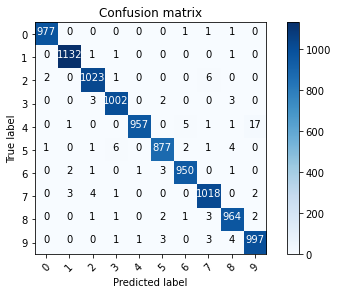

In [12]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
misclassified_idx = np.where(p_test != Y_test)[0]
len(misclassified_idx)

103

Text(0.5, 1.0, 'True label: 1, Predicted: 2')

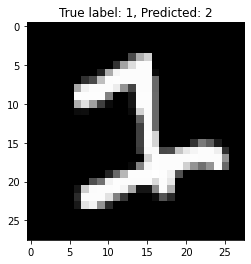

In [16]:
idx = np.random.choice(misclassified_idx)
plt.imshow(X_test[idx], cmap='gray')
plt.title(f"True label: {Y_test[idx]}, Predicted: {p_test[idx]}")